In [6]:
import luigi
from bs4 import BeautifulSoup
import urllib.request
import urllib.response
import mechanicalsoup
import pandas as pd
import numpy as np
import re
import requests
import luigi
from bs4 import BeautifulSoup
import urllib.request
import urllib.response
import mechanicalsoup
import pandas as pd
import datetime as dt
from Classes.Utils import create_directory

create_directory("Data/Cleaned")
create_directory("Data/Summary")
downloads_dir_loan = "Data/Downloads/DeclinedLoanData"
cleaned_dir = "Data/Cleaned/"
summary_dir = "Data/Summary/"

def remove_columns(fullData):
    fullData = fullData.drop(['Loan Title'], axis=1)
    return fullData

def replace_by_na(fullData):
    fullData['State'] = np.where(fullData['State'].isnull(), 'NA', fullData['State'])
    return fullData

def separate_application_date(fullData):
    fullData['Application Date'] = pd.to_datetime(fullData['Application Date'])
    fullData['Year'] = fullData['Application Date'].dt.year
    fullData['Month'] = fullData['Application Date'].dt.month
    fullData['Day'] = fullData['Application Date'].dt.day
    return fullData

def replace_by_default(fullData):
    fullData['Risk_Score'] = fullData['Risk_Score'].fillna(99999)
    return fullData

#Looping over all the csv to load and process the data
ls_dir = os.listdir(downloads_dir_loan)
fullData = None
for file in ls_dir:
    #     only if file is csv
    regexp = re.compile(r'.csv')
    if(regexp.search(file)):
        print(file)
        filePath = downloads_dir_loan + "/" + file
        # # # READ DATA INTO DATAFRAME
        data = pd.read_csv(filePath + '', sep = ",", skiprows=[0])

        # Removing Rows where all columns are null or only have value for 1 column
        data.dropna(how='all', inplace = True)
        data.dropna(thresh=2, inplace = True)

        try:
            fullData = pd.concat([fullData, data])
            fullData1 = fullData2 = fullData
        except:
            fullData = data

        data = None

# Describe downloaded dataset
fullData['Employment Length'] = fullData['Employment Length'].str.replace('+','')
fullData['Employment Length'] = fullData['Employment Length'].str.replace('<','')
fullData['Employment Length'] = fullData['Employment Length'].str.replace('years','')
fullData['Employment Length'] = fullData['Employment Length'].str.replace('year','')
fullData['Employment Length'] = fullData['Employment Length'].str.replace('n/a','0')
fullData['Zip Code'] = fullData['Zip Code'].str.replace('xx','00')


fullData['Employment Length'] = fullData['Employment Length'].astype(np.int64)

fullData.to_csv(downloads_dir_loan + "combined_downloaded_reject_loandata.csv", sep=',', index = False)
summary = fullData.describe()

# SAVE summary of downloaded data to files
print(summary)
summary.to_csv(summary_dir + "summary_downloaded_loandata.csv"  , sep=',', index = True)

 # CLEAN DATA
fullData = remove_columns(fullData)

fullData = replace_by_na(fullData)

fullData = separate_application_date(fullData)

fulldata = replace_by_default(fullData)

summary = fullData.describe()

# SAVE Cleaned/Preprocessed Data
fullData.to_csv(cleaned_dir + "cleaned_reject_loandata1.csv", sep=',', index = False)


# Summarize and save cleaned dataset
summary.to_csv(summary_dir + "summary_reject_cleaned_loandata1.csv"  , sep=',', index = True)


RejectStatsA.csv
RejectStatsB.csv
RejectStatsD.csv
RejectStats_2016Q1.csv
RejectStats_2016Q2.csv
RejectStats_2016Q3.csv
RejectStats_2016Q4.csv
       Amount Requested      Risk_Score  Employment Length      Policy Code
count   11079386.000000  4676607.000000    11079386.000000  11079386.000000
mean       13391.543411      623.382936           1.707245         0.005543
std        16196.710716      108.408128           1.884364         0.105140
min            0.000000        0.000000           0.000000         0.000000
25%         4500.000000      591.000000           1.000000         0.000000
50%        10000.000000      640.000000           1.000000         0.000000
75%        20000.000000      678.000000           1.000000         0.000000
max      1400000.000000      990.000000          10.000000         2.000000


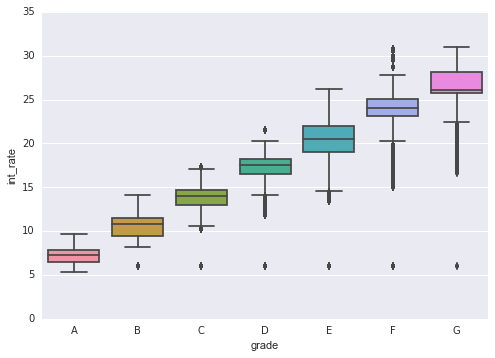

In [36]:
#Even controlling for the grade of the loan (as this will be used to calculate the interest rate) the defaulting
#loans still have a higher interest rate than non defaulting loans until you get to grades F and G

import seaborn as sns
import matplotlib.pyplot as plt

ax1 = sns.boxplot(x='grade', y='int_rate', data=loandata,
                     order=sorted(loandata['grade'].unique()))
ax1.set_ybound(lower=0)
plt.show()

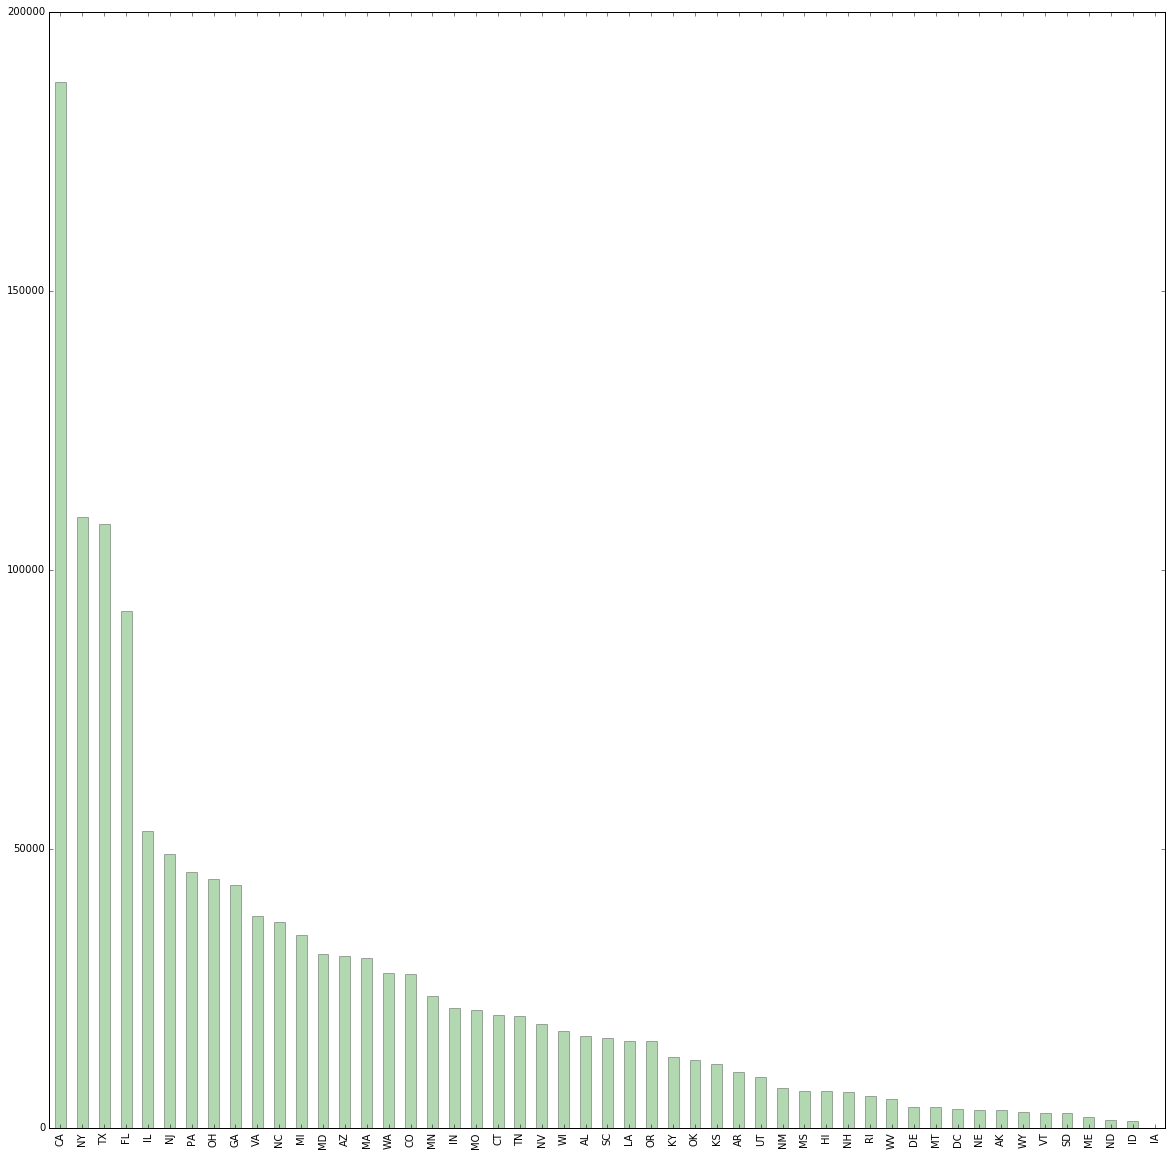

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline
loandata = pd.read_csv("C:/Users/taj/Desktop/cleaned_loandata.csv",encoding = "ISO-8859-1",low_memory=False)

fig = plt.figure(figsize=(20, 20), dpi=100)
loandata['addr_state'].value_counts().plot(kind='bar',alpha=.30,color='green')


In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline

#loandata = pd.read_csv("G:/ads_assignment_2/Data/Cleaned/cleaned_loandata.csv",encoding = "ISO-8859-1",low_memory=False)
#Graph Depicting the Loan amount requested since 2007-2016(Q4) for the Loan Data Set. We can see that the 
loandata.head()
#loandata['loan_amnt'].hist()
#plt.title("Plotting Amount Requested against Year")
#plt.ylabel('Amount Requested')
#plt.xlabel('Year')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,90day_worse_rating
0,NaN,NaN,5000,5000,4975,36,10.65,162.87,B,B2,...,0,0,0,0,0,112389,37888,15000,31728,0
1,NaN,NaN,2500,2500,2500,60,15.27,59.83,C,C4,...,0,0,0,0,0,112389,37888,15000,31728,0
2,NaN,NaN,2400,2400,2400,36,15.96,84.33,C,C5,...,0,0,0,0,0,112389,37888,15000,31728,0
3,NaN,NaN,10000,10000,10000,36,13.49,339.31,C,C1,...,0,0,0,0,0,112389,37888,15000,31728,0
4,NaN,NaN,3000,3000,3000,60,12.69,67.79,B,B5,...,0,0,0,0,0,112389,37888,15000,31728,0


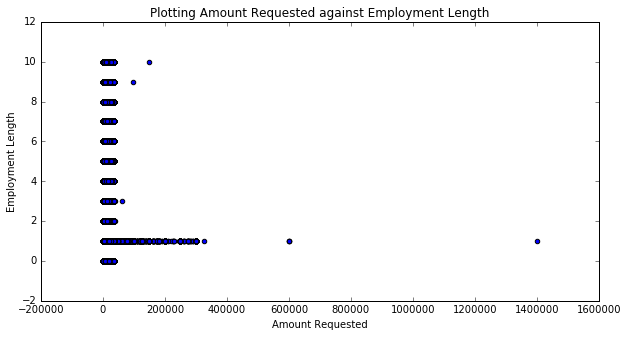

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Plotting the Amount Requested against Employment Length
%matplotlib inline
plt.figure(figsize=(10,5))
plt.scatter(fullData['Amount Requested'], fullData['Employment Length'])
plt.title("Amount Requested against Employment Length")
plt.ylabel('Employment Length')
plt.xlabel('Amount Requested')
plt.show()

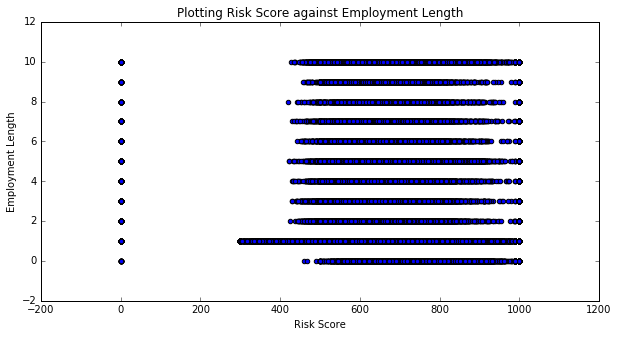

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Plotting Risk Score against Employment Length
%matplotlib inline
plt.figure(figsize=(10,5))
plt.scatter(fullData['Risk_Score'], fullData['Employment Length'])
plt.title("Plotting Risk Score against Employment Length")
plt.ylabel('Employment Length')
plt.xlabel('Risk Score')
plt.show()

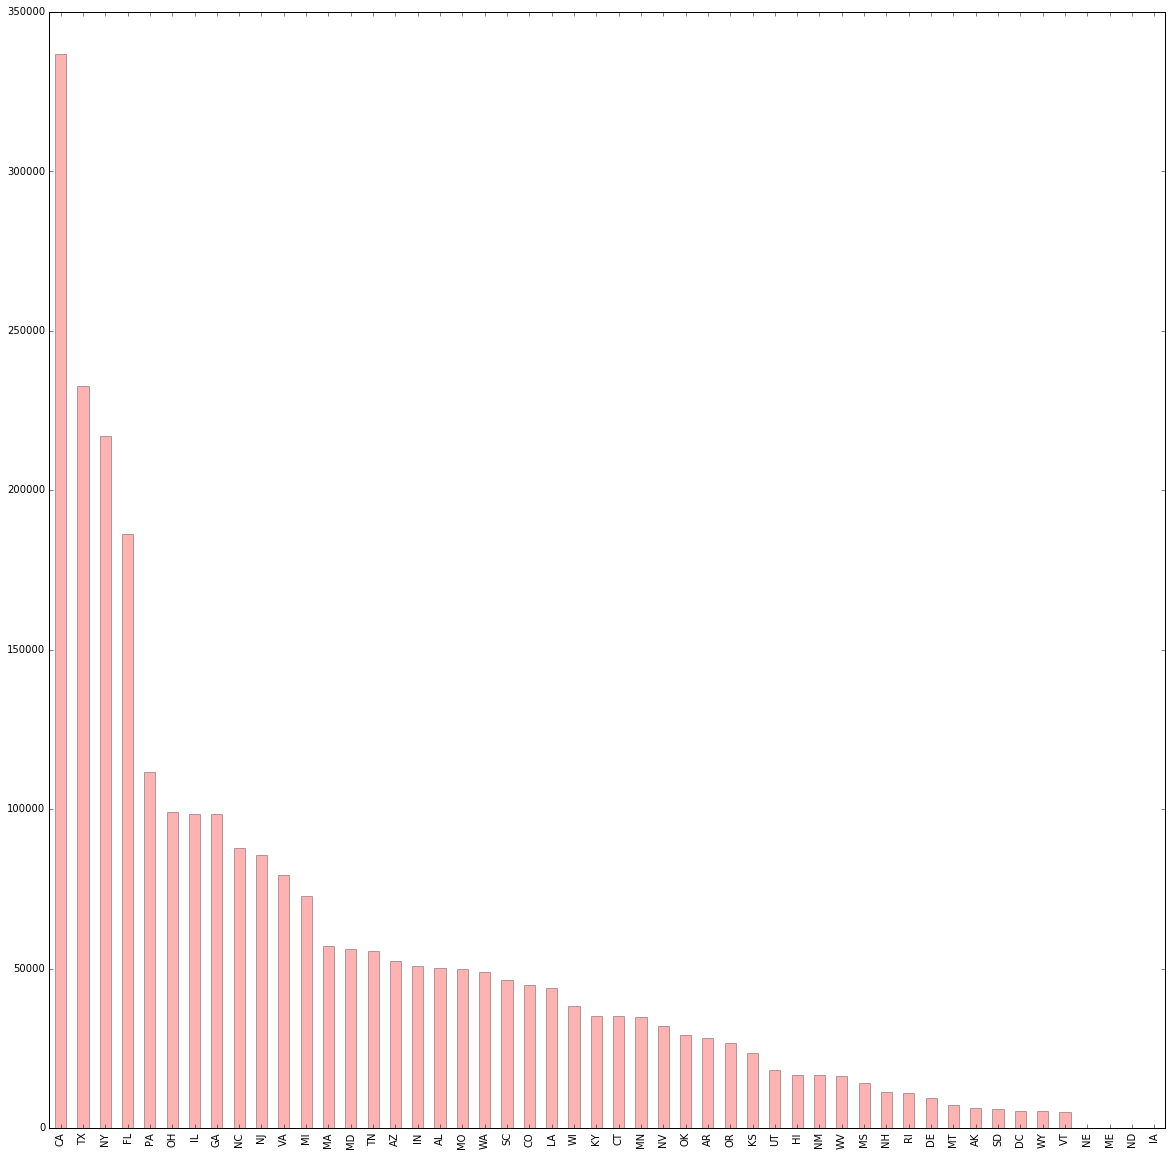

In [33]:
fig = plt.figure(figsize=(20, 20), dpi=100)
fullData['State'].value_counts().plot(kind='bar',alpha=.30,color='red')

In [53]:
#Summary Chart for State Wise Declined Data Analysis
import plotly.plotly as py
import plotly.graph_objs as graph_objs

for col in df_plot.columns:
    df_plot[col] = df_plot[col].astype(str)

    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_plot['text'] = df_plot['code'] + '<br>' +\
    'Avg Balance Per Borrower ($ USD): '+df_plot['Average_Balance']+'<br>'+\
    'Avg Annual Income Per Borrower ($ USD): '+df_plot['Average_Income']
    

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_plot['code'],
        z = df_plot['Loan_Funding'], 
        locationmode = 'USA-states',
        text = df_plot['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]

layout = dict(
        title = 'Lending Club Portfolio<br> Total Funded By State <br> (Hover over state for other metrics)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [50]:
State_List = []
for x in df['addr_state']:
    if x not in State_List:
        State_List.append(x)

Loan_Amount = []
Average_Balance = []
Default_Rate = []
Weighted_Rate = []
Average_Income = []
Average_Employment_Length = []
Average_DTI = []

for x in State_List:
    new_df = df[df['addr_state'] == x]
    
    Loan_Sum = sum(new_df['funded_amnt'])
    Loan_Amount.append(Loan_Sum)
    
    Average_Balance.append(Loan_Sum/len(new_df['funded_amnt']))
    
    Defaults = []
    for value in new_df.loan_status:
        if value == 'Default':
            Defaults.append(1)
        if value == 'Charged Off':
            Defaults.append(1)
        if value == 'Late (31-120 days)':
            Defaults.append(1)   
        if value == 'Late (16-30 days)':
            Defaults.append(1)
        if value == 'Does not meet the credit policy. Status:Charged Off':
            Defaults.append(1) 
    Default_R = len(Defaults) / len(new_df.loan_status)  
    Default_Rate.append(Default_R)
    
    new_df['weighted'] = (new_df['int_rate']/100)*new_df['funded_amnt']
    Weighted_Sum = sum(new_df['weighted'])
    Weighted_i_rate = Weighted_Sum / Loan_Sum
    Weighted_Rate.append(Weighted_i_rate)
    
    Income_Average = np.mean(new_df['annual_inc'])
    Average_Income.append(Income_Average)
    

    Employ_Length = []
    for term in new_df.emp_length:
        if term == '10+ years':
            Employ_Length.append(10)
        if term == '< 1 year':
            Employ_Length.append(0.5)    
        if term == '1 year':
            Employ_Length.append(1)
        if term == '3 years':
            Employ_Length.append(3)
        if term == '8 years':
            Employ_Length.append(8)
        if term == '9 years':
            Employ_Length.append(9)    
        if term == '4 years':
            Employ_Length.append(4)
        if term == '5 years':
            Employ_Length.append(5)
        if term == '6 years':
            Employ_Length.append(6)
        if term == '2 years':
            Employ_Length.append(2)    
        if term == '7 years':
            Employ_Length.append(7)
        if term == 'n/a':
            Employ_Length.append(0)  
            
    Average_Employment_Length.append(np.mean(Employ_Length))        
    
    DTI_Average = np.mean(new_df['dti'])
    Average_DTI.append(DTI_Average)
    
                       
from collections import OrderedDict
combine_data = OrderedDict([ ('Loan_Funding',Loan_Amount),
                         ('Average_Balance', Average_Balance),
                         ('Default_Rate',  Default_Rate),
                         ('Weighted_Rate', Weighted_Rate),
                         ('Average_Income', Average_Income),
                         ('Average_Employment_Length', Average_Employment_Length),
                         ('Average_DTI', DTI_Average),  
                         ('code', State_List)])

df_plot = pd.DataFrame.from_dict(combine_data)
#df_plot = df_plot.round(decimals=2)
df_plot.head()

C:\Users\taj\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\taj\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning:

Mean of empty slice.



,Loan_Funding,Average_Balance,Default_Rate,Weighted_Rate,Average_Income,Average_Employment_Length,Average_DTI,code
0,438845500,14214.079808,0.103874,0.134576,73571.455725,NaN,20.170444,AZ
1,651109950,14951.889912,0.092153,0.136651,76663.526115,NaN,20.170444,GA
2,806891300,15169.410814,0.089769,0.134083,78710.084680,NaN,20.170444,IL
3,2776212525,14813.182109,0.106816,0.134343,81815.080220,NaN,20.170444,CA
4,213666325,13729.121956,0.085845,0.133207,67663.839190,NaN,20.170444,OR


In [40]:
#https://plot.ly/python/choropleth-maps/
import numpy as np
import pandas as pd
import itertools
from sklearn import preprocessing
import matplotlib.pyplot as plt 

df  = pd.read_csv("C:/Users/taj/Desktop/cleaned_loandata.csv",encoding = "ISO-8859-1",low_memory=False)

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#print (df.columns)